# Segmentação de clientes

<h2><a href="https://www.linkedin.com/in/fabio-henrique-rodrigues?utm_source=share&utm_campaign=share_via&utm_content=profile&utm_medium=android_app " target="_blank">Fabio Henrique Rodrigues</a></h2>

Mais projetos pessoais <a href="https://sites.google.com/view/fabiohenriqueprojetos/in%C3%ADcio" target="_blank">Meu portifolio</a>

---

Irei segmentar os clientes similares em 3 grupos diferentes Bronze, Prata e Ouro, para ajudar a equipe na personalização de marketing

## Importando biliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn.cluster import KMeans # clusterizar os clietes
from sklearn.preprocessing import StandardScaler # Processamento de dados
from sklearn.metrics import silhouette_score # medir a quialidade do valor de k
import joblib # Salvar o resultado em disco

## Aquisição do Dataset

In [2]:
df = pd.read_csv('dados_marketing.csv', sep=";")

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
df.head()

,ID,Ano Nascimento,Escolaridade,Estado Civil,Salario Anual,Filhos em Casa,Adolescentes em Casa,Data Cadastro,Dias Desde Ultima Compra,Gasto com Eletronicos,Gasto com Brinquedos,Gasto com Moveis,Gasto com Utilidades,Gasto com Alimentos,Gasto com Vestuario,Numero de Compras com Desconto,Numero de Compras na Web,Numero de Compras via Catalogo,Numero de Compras na Loja,Numero Visitas WebSite Mes,Compra na Campanha 1,Compra na Campanha 2,Compra na Campanha 3,Compra na Campanha 4,Compra na Campanha 5,Comprou,Pais
0,2795,1958,Mestrado,Solteiro,30523.0,2,1,07/01/2020,0,5,0,3,0,0,5,1,1,0,2,7,0,0,0,0,0,0,Chile
1,2285,1954,Mestrado,Casado,36634.0,0,1,05/12/2023,0,213,9,76,4,3,30,3,5,2,5,7,0,0,0,0,0,0,Espanha
2,115,1966,Mestrado,Solteiro,43456.0,0,1,03/02/2023,0,275,11,68,25,7,7,3,5,1,8,5,0,0,0,0,0,0,Argentina
3,10470,1979,Mestrado,Solteiro,40662.0,1,0,03/05/2023,0,40,2,23,0,4,23,2,2,1,3,4,0,0,0,0,0,0,Alemanha
4,4065,1976,Doutorado,Solteiro,49544.0,1,0,02/11/2020,0,308,0,73,0,0,23,2,5,1,8,7,0,0,0,0,0,0,Estados Unidos


In [5]:
df.tail()

,ID,Ano Nascimento,Escolaridade,Estado Civil,Salario Anual,Filhos em Casa,Adolescentes em Casa,Data Cadastro,Dias Desde Ultima Compra,Gasto com Eletronicos,Gasto com Brinquedos,Gasto com Moveis,Gasto com Utilidades,Gasto com Alimentos,Gasto com Vestuario,Numero de Compras com Desconto,Numero de Compras na Web,Numero de Compras via Catalogo,Numero de Compras na Loja,Numero Visitas WebSite Mes,Compra na Campanha 1,Compra na Campanha 2,Compra na Campanha 3,Compra na Campanha 4,Compra na Campanha 5,Comprou,Pais
1995,8132,1975,Doutorado,Solteiro,60631.0,1,1,04/05/2020,88,565,6,65,0,6,19,5,9,2,8,7,0,1,0,0,0,0,Alemanha
1996,503,1985,Mestrado,Solteiro,20559.0,1,0,03/11/2020,88,13,1,29,3,0,7,2,2,0,3,8,0,0,0,0,0,0,Brasil
1997,8148,1956,Mestrado,Casado,50898.0,1,1,01/08/2020,88,285,28,242,55,114,135,13,6,2,12,5,0,0,0,0,0,0,Espanha
1998,2736,1978,Curso Superior,Solteiro,73807.0,0,1,01/02/2020,88,366,124,156,71,78,54,2,5,5,11,2,0,0,0,0,0,0,Argentina
1999,8162,1956,Mestrado,Casado,14661.0,0,0,01/01/2020,88,4,1,11,6,2,2,1,1,0,3,6,0,0,0,0,0,0,Estados Unidos


## Analise Exploratoria dos dados

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 27 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ID                              2000 non-null   int64  
 1   Ano Nascimento                  2000 non-null   int64  
 2   Escolaridade                    2000 non-null   object 
 3   Estado Civil                    2000 non-null   object 
 4   Salario Anual                   1981 non-null   float64
 5   Filhos em Casa                  2000 non-null   int64  
 6   Adolescentes em Casa            2000 non-null   int64  
 7   Data Cadastro                   2000 non-null   object 
 8   Dias Desde Ultima Compra        2000 non-null   int64  
 9   Gasto com Eletronicos           2000 non-null   int64  
 10  Gasto com Brinquedos            2000 non-null   int64  
 11  Gasto com Moveis                2000 non-null   int64  
 12  Gasto com Utilidades            20

In [7]:
df.shape

(2000, 27)

In [8]:
df.isna().sum()

ID                                 0
Ano Nascimento                     0
Escolaridade                       0
Estado Civil                       0
Salario Anual                     19
Filhos em Casa                     0
Adolescentes em Casa               0
Data Cadastro                      0
Dias Desde Ultima Compra           0
Gasto com Eletronicos              0
Gasto com Brinquedos               0
Gasto com Moveis                   0
Gasto com Utilidades               0
Gasto com Alimentos                0
Gasto com Vestuario                0
Numero de Compras com Desconto     0
Numero de Compras na Web           0
Numero de Compras via Catalogo     0
Numero de Compras na Loja          0
Numero Visitas WebSite Mes         0
Compra na Campanha 1               0
Compra na Campanha 2               0
Compra na Campanha 3               0
Compra na Campanha 4               0
Compra na Campanha 5               0
Comprou                            0
Pais                               0
d

In [9]:
df.duplicated().sum()

0

In [10]:
df.describe()

,ID,Ano Nascimento,Salario Anual,Filhos em Casa,Adolescentes em Casa,Dias Desde Ultima Compra,Gasto com Eletronicos,Gasto com Brinquedos,Gasto com Moveis,Gasto com Utilidades,Gasto com Alimentos,Gasto com Vestuario,Numero de Compras com Desconto,Numero de Compras na Web,Numero de Compras via Catalogo,Numero de Compras na Loja,Numero Visitas WebSite Mes,Compra na Campanha 1,Compra na Campanha 2,Compra na Campanha 3,Compra na Campanha 4,Compra na Campanha 5,Comprou
count,2000.000000,2000.000000,1981.000000,2000.000000,2000.000000,2000.00000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,5617.382500,1968.797000,52290.852600,0.447500,0.503000,43.73500,303.92850,26.316500,164.143500,37.587000,26.826500,43.63350,2.332500,4.075000,2.635500,5.797500,5.327500,0.074000,0.073000,0.071500,0.066500,0.013000,0.160000
std,3259.910118,11.981468,25484.701911,0.535151,0.540497,25.85885,337.84483,40.317925,221.565768,54.748143,41.003476,51.58962,1.952652,2.754663,2.885793,3.275952,2.440947,0.261836,0.260202,0.257723,0.249216,0.113302,0.366698
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2814.750000,1959.000000,35196.000000,0.000000,0.000000,22.00000,23.00000,1.000000,16.000000,3.000000,1.000000,9.00000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5492.000000,1970.000000,51766.000000,0.000000,0.000000,45.00000,175.50000,8.000000,67.000000,12.000000,8.000000,24.00000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8495.000000,1977.000000,68281.000000,1.000000,1.000000,66.00000,503.25000,32.000000,226.000000,50.000000,33.000000,55.00000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,88.00000,1493.00000,199.000000,1725.000000,259.000000,263.000000,362.00000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
df.describe(include='object')

,Escolaridade,Estado Civil,Data Cadastro,Pais
count,2000,2000,2000,2000
unique,5,3,392,7
top,Curso Superior,Solteiro,5/04/2021,Estados Unidos
freq,1000,1197,32,977


In [12]:
df.nunique()

ID                                2000
Ano Nascimento                      57
Escolaridade                         5
Estado Civil                         3
Salario Anual                     1769
Filhos em Casa                       3
Adolescentes em Casa                 3
Data Cadastro                      392
Dias Desde Ultima Compra            89
Gasto com Eletronicos              729
Gasto com Brinquedos               157
Gasto com Moveis                   526
Gasto com Utilidades               179
Gasto com Alimentos                169
Gasto com Vestuario                207
Numero de Compras com Desconto      15
Numero de Compras na Web            14
Numero de Compras via Catalogo      13
Numero de Compras na Loja           14
Numero Visitas WebSite Mes          16
Compra na Campanha 1                 2
Compra na Campanha 2                 2
Compra na Campanha 3                 2
Compra na Campanha 4                 2
Compra na Campanha 5                 2
Comprou                  

## Transformação / Tratamento

In [13]:
for coluna in df.columns:
    df.columns = df.columns.str.lower()
    df.columns = df.columns.str.replace(" ","_")
df.head()

,id,ano_nascimento,escolaridade,estado_civil,salario_anual,filhos_em_casa,adolescentes_em_casa,data_cadastro,dias_desde_ultima_compra,gasto_com_eletronicos,gasto_com_brinquedos,gasto_com_moveis,gasto_com_utilidades,gasto_com_alimentos,gasto_com_vestuario,numero_de_compras_com_desconto,numero_de_compras_na_web,numero_de_compras_via_catalogo,numero_de_compras_na_loja,numero_visitas_website_mes,compra_na_campanha_1,compra_na_campanha_2,compra_na_campanha_3,compra_na_campanha_4,compra_na_campanha_5,comprou,pais
0,2795,1958,Mestrado,Solteiro,30523.0,2,1,07/01/2020,0,5,0,3,0,0,5,1,1,0,2,7,0,0,0,0,0,0,Chile
1,2285,1954,Mestrado,Casado,36634.0,0,1,05/12/2023,0,213,9,76,4,3,30,3,5,2,5,7,0,0,0,0,0,0,Espanha
2,115,1966,Mestrado,Solteiro,43456.0,0,1,03/02/2023,0,275,11,68,25,7,7,3,5,1,8,5,0,0,0,0,0,0,Argentina
3,10470,1979,Mestrado,Solteiro,40662.0,1,0,03/05/2023,0,40,2,23,0,4,23,2,2,1,3,4,0,0,0,0,0,0,Alemanha
4,4065,1976,Doutorado,Solteiro,49544.0,1,0,02/11/2020,0,308,0,73,0,0,23,2,5,1,8,7,0,0,0,0,0,0,Estados Unidos


In [14]:
df['data_cadastro'] = pd.to_datetime(df['data_cadastro'], format="%d/%m/%Y")

In [15]:
df['idade'] = 2023 - df['ano_nascimento'] 

In [16]:
coluna = df.pop('idade')
df.insert(1, 'idade', coluna)

In [17]:
df['idade'].describe()

count    2000.000000
mean       54.203000
std        11.981468
min        27.000000
25%        46.000000
50%        53.000000
75%        64.000000
max       130.000000
Name: idade, dtype: float64

In [18]:
# possivel dados inconsistentes
df.query('idade > 80')

,id,idade,ano_nascimento,escolaridade,estado_civil,salario_anual,filhos_em_casa,adolescentes_em_casa,data_cadastro,dias_desde_ultima_compra,gasto_com_eletronicos,gasto_com_brinquedos,gasto_com_moveis,gasto_com_utilidades,gasto_com_alimentos,gasto_com_vestuario,numero_de_compras_com_desconto,numero_de_compras_na_web,numero_de_compras_via_catalogo,numero_de_compras_na_loja,numero_visitas_website_mes,compra_na_campanha_1,compra_na_campanha_2,compra_na_campanha_3,compra_na_campanha_4,compra_na_campanha_5,comprou,pais
513,11004,130,1893,Segundo Grau,Solteiro,60182.0,0,1,2021-02-05,23,8,0,5,7,0,2,1,1,0,2,4,0,0,0,0,0,0,Espanha
827,1150,124,1899,Doutorado,Casado,83532.0,0,0,2023-03-09,36,755,144,562,104,64,224,1,4,6,4,1,0,0,1,0,0,0,Estados Unidos
1740,6932,82,1941,Doutorado,Solteiro,93027.0,0,0,2023-07-04,77,1285,42,716,55,0,21,0,7,10,5,2,0,0,1,0,0,0,Estados Unidos


In [19]:
# Filtragem data a partir de 2022 (Curiosidade)
df.query('data_cadastro >= "2022-01-01"')

,id,idade,ano_nascimento,escolaridade,estado_civil,salario_anual,filhos_em_casa,adolescentes_em_casa,data_cadastro,dias_desde_ultima_compra,gasto_com_eletronicos,gasto_com_brinquedos,gasto_com_moveis,gasto_com_utilidades,gasto_com_alimentos,gasto_com_vestuario,numero_de_compras_com_desconto,numero_de_compras_na_web,numero_de_compras_via_catalogo,numero_de_compras_na_loja,numero_visitas_website_mes,compra_na_campanha_1,compra_na_campanha_2,compra_na_campanha_3,compra_na_campanha_4,compra_na_campanha_5,comprou,pais
1,2285,69,1954,Mestrado,Casado,36634.0,0,1,2023-12-05,0,213,9,76,4,3,30,3,5,2,5,7,0,0,0,0,0,0,Espanha
2,115,57,1966,Mestrado,Solteiro,43456.0,0,1,2023-02-03,0,275,11,68,25,7,7,3,5,1,8,5,0,0,0,0,0,0,Argentina
3,10470,44,1979,Mestrado,Solteiro,40662.0,1,0,2023-05-03,0,40,2,23,0,4,23,2,2,1,3,4,0,0,0,0,0,0,Alemanha
5,10968,54,1969,Curso Superior,Solteiro,57731.0,0,1,2022-04-11,0,266,21,300,65,8,44,4,8,8,6,6,0,0,0,0,0,0,Argentina
6,5985,58,1965,Mestrado,Solteiro,33168.0,0,1,2022-12-10,0,80,1,37,0,1,3,3,2,1,4,7,0,0,0,0,0,0,Estados Unidos
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1985,7433,38,1985,Curso Superior,Solteiro,29760.0,1,0,2022-09-08,87,64,4,68,7,5,17,4,3,1,4,8,0,0,0,0,0,0,Estados Unidos
1988,10323,71,1952,Curso Superior,Solteiro,49413.0,0,1,2023-04-10,88,205,7,41,3,2,46,2,4,2,5,5,0,0,0,0,0,0,Estados Unidos
1989,4682,65,1958,Curso Superior,Solteiro,51876.0,0,0,2023-03-10,88,99,27,102,28,48,6,1,2,2,8,1,0,0,0,0,0,0,Alemanha
1990,3083,49,1974,Curso Superior,Solteiro,45837.0,1,1,2023-03-07,88,215,13,87,17,17,24,5,6,2,5,7,0,0,0,0,0,0,Estados Unidos


In [20]:
df['ano_nascimento'] = pd.to_datetime(df['ano_nascimento'], format="%Y")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 28 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              2000 non-null   int64         
 1   idade                           2000 non-null   int64         
 2   ano_nascimento                  2000 non-null   datetime64[ns]
 3   escolaridade                    2000 non-null   object        
 4   estado_civil                    2000 non-null   object        
 5   salario_anual                   1981 non-null   float64       
 6   filhos_em_casa                  2000 non-null   int64         
 7   adolescentes_em_casa            2000 non-null   int64         
 8   data_cadastro                   2000 non-null   datetime64[ns]
 9   dias_desde_ultima_compra        2000 non-null   int64         
 10  gasto_com_eletronicos           2000 non-null   int64         
 11  gast

In [21]:
df_int = df.select_dtypes(include='int')
df_int

,id,idade,filhos_em_casa,adolescentes_em_casa,dias_desde_ultima_compra,gasto_com_eletronicos,gasto_com_brinquedos,gasto_com_moveis,gasto_com_utilidades,gasto_com_alimentos,gasto_com_vestuario,numero_de_compras_com_desconto,numero_de_compras_na_web,numero_de_compras_via_catalogo,numero_de_compras_na_loja,numero_visitas_website_mes,compra_na_campanha_1,compra_na_campanha_2,compra_na_campanha_3,compra_na_campanha_4,compra_na_campanha_5,comprou
0,2795,65,2,1,0,5,0,3,0,0,5,1,1,0,2,7,0,0,0,0,0,0
1,2285,69,0,1,0,213,9,76,4,3,30,3,5,2,5,7,0,0,0,0,0,0
2,115,57,0,1,0,275,11,68,25,7,7,3,5,1,8,5,0,0,0,0,0,0
3,10470,44,1,0,0,40,2,23,0,4,23,2,2,1,3,4,0,0,0,0,0,0
4,4065,47,1,0,0,308,0,73,0,0,23,2,5,1,8,7,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,8132,48,1,1,88,565,6,65,0,6,19,5,9,2,8,7,0,1,0,0,0,0
1996,503,38,1,0,88,13,1,29,3,0,7,2,2,0,3,8,0,0,0,0,0,0
1997,8148,67,1,1,88,285,28,242,55,114,135,13,6,2,12,5,0,0,0,0,0,0
1998,2736,45,0,1,88,366,124,156,71,78,54,2,5,5,11,2,0,0,0,0,0,0


In [22]:
df['total_gasto'] = df[['gasto_com_eletronicos', 
                        'gasto_com_brinquedos', 
                        'gasto_com_moveis', 
                        'gasto_com_utilidades', 
                        'gasto_com_alimentos',	
                        'gasto_com_vestuario']].sum(axis=1)

## Analise descritiva

In [23]:
df['educacao'] = df['escolaridade']
df['educacao'] = df['educacao'].replace({
                        'Primeiro Grau' : 1,
                        'Segundo Grau' : 2,
                        'Curso Superior' : 3,
                        'Doutorado' : 4,
                        'Mestrado' : 5})
df.head()

,id,idade,ano_nascimento,escolaridade,estado_civil,salario_anual,filhos_em_casa,adolescentes_em_casa,data_cadastro,dias_desde_ultima_compra,gasto_com_eletronicos,gasto_com_brinquedos,gasto_com_moveis,gasto_com_utilidades,gasto_com_alimentos,gasto_com_vestuario,numero_de_compras_com_desconto,numero_de_compras_na_web,numero_de_compras_via_catalogo,numero_de_compras_na_loja,numero_visitas_website_mes,compra_na_campanha_1,compra_na_campanha_2,compra_na_campanha_3,compra_na_campanha_4,compra_na_campanha_5,comprou,pais,total_gasto,educacao
0,2795,65,1958-01-01,Mestrado,Solteiro,30523.0,2,1,2020-01-07,0,5,0,3,0,0,5,1,1,0,2,7,0,0,0,0,0,0,Chile,13,5
1,2285,69,1954-01-01,Mestrado,Casado,36634.0,0,1,2023-12-05,0,213,9,76,4,3,30,3,5,2,5,7,0,0,0,0,0,0,Espanha,335,5
2,115,57,1966-01-01,Mestrado,Solteiro,43456.0,0,1,2023-02-03,0,275,11,68,25,7,7,3,5,1,8,5,0,0,0,0,0,0,Argentina,393,5
3,10470,44,1979-01-01,Mestrado,Solteiro,40662.0,1,0,2023-05-03,0,40,2,23,0,4,23,2,2,1,3,4,0,0,0,0,0,0,Alemanha,92,5
4,4065,47,1976-01-01,Doutorado,Solteiro,49544.0,1,0,2020-11-02,0,308,0,73,0,0,23,2,5,1,8,7,0,0,0,0,0,0,Estados Unidos,404,4


In [24]:
df['salario_anual'] = df['salario_anual'].fillna(0)

In [25]:
df.isnull().sum()

id                                0
idade                             0
ano_nascimento                    0
escolaridade                      0
estado_civil                      0
salario_anual                     0
filhos_em_casa                    0
adolescentes_em_casa              0
data_cadastro                     0
dias_desde_ultima_compra          0
gasto_com_eletronicos             0
gasto_com_brinquedos              0
gasto_com_moveis                  0
gasto_com_utilidades              0
gasto_com_alimentos               0
gasto_com_vestuario               0
numero_de_compras_com_desconto    0
numero_de_compras_na_web          0
numero_de_compras_via_catalogo    0
numero_de_compras_na_loja         0
numero_visitas_website_mes        0
compra_na_campanha_1              0
compra_na_campanha_2              0
compra_na_campanha_3              0
compra_na_campanha_4              0
compra_na_campanha_5              0
comprou                           0
pais                        

## Processo de Estudo

In [26]:
# Colunas que contem dados demograficos e comportamento do cliente
x = df[['idade',
        'educacao',
        'salario_anual',
        'filhos_em_casa',
        'dias_desde_ultima_compra',
        'gasto_com_eletronicos',
        'gasto_com_brinquedos',
        'gasto_com_moveis',
        'gasto_com_utilidades',
        'gasto_com_alimentos',
        'gasto_com_vestuario',
        'numero_de_compras_com_desconto',
        'numero_de_compras_na_web',
        'numero_de_compras_via_catalogo',
        'numero_de_compras_na_loja',
        'numero_visitas_website_mes',
        'compra_na_campanha_1',
        'compra_na_campanha_2',
        'compra_na_campanha_3',
        'compra_na_campanha_4',
        'compra_na_campanha_5',
        'comprou',
        'total_gasto']]

In [27]:
x = x.fillna(0)  # Preenche valores NaN com 0

## Analise de Cotovelo

### Definindo o valor de k para o numero de agrupamentos do clientes

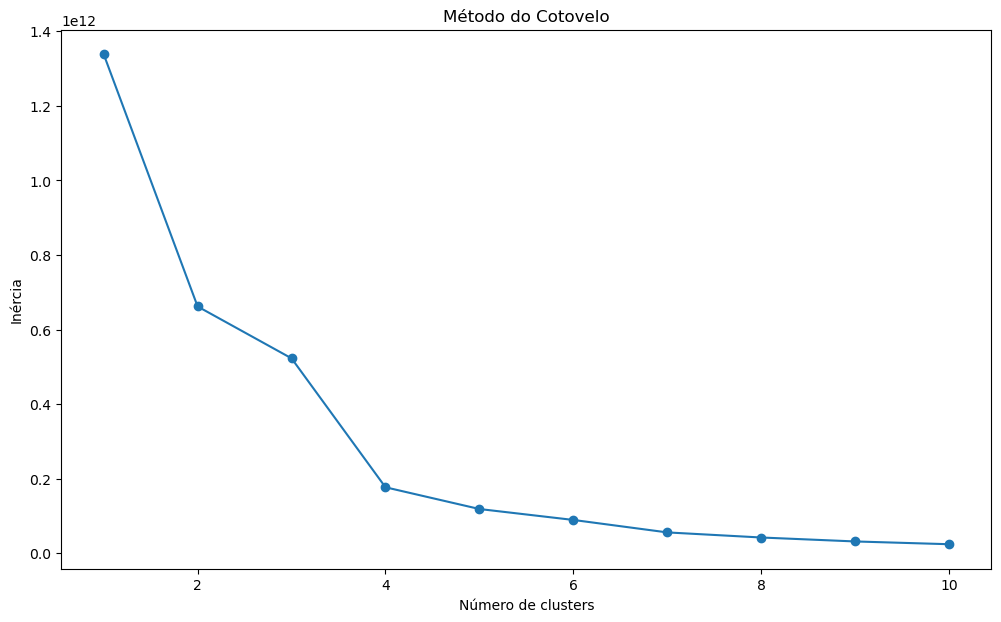

In [28]:


inertia = [] # para armazenar os valores de inércia para diferentes números de clusters.
for k in range(1, 11): #  o número de clusters, variando de 1 a 10. O loop calcula a inércia para cada valor de k
    kmeans = KMeans(n_clusters=k, random_state=42) # garente a reprodutividade dos numeros de cluster defindos(k)
    kmeans.fit(x) # realizando o agrupamento dos dados
    inertia.append(kmeans.inertia_) # A inércia é a soma das distâncias quadráticas das amostras aos seus centros de cluster, 
                                    #e serve como uma medida da compactação dos clusters.

plt.figure(figsize=(12, 7))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Número de clusters')
plt.ylabel('Inércia')
plt.title('Método do Cotovelo')
plt.show()


### A inércia, que é uma medida de quão compactos os clusters são. Uma inércia menor significa que os pontos estão mais próximos dos centróides dos seus clusters, indicando grupos mais coesos.

### O Método do Cotovelo ajuda a identificar o número ideal de clusters em uma análise de clusterização. Através do gráfico que mostra a inércia em função do número de clusters, observa-se uma curva descendente que inicialmente cai rapidamente, mas que começa a se achatar em determinado ponto, formando um "cotovelo". Esse "cotovelo" indica onde a adição de mais clusters não reduz significativamente a inércia, sugerindo que o número de clusters correspondente ao cotovelo é o mais adequado para segmentar os dados de forma eficiente, equilibrando a definição dos clusters e a complexidade do modelo.

## Analise de Silhueta

### Avaliaando a qualidade dos Clusters

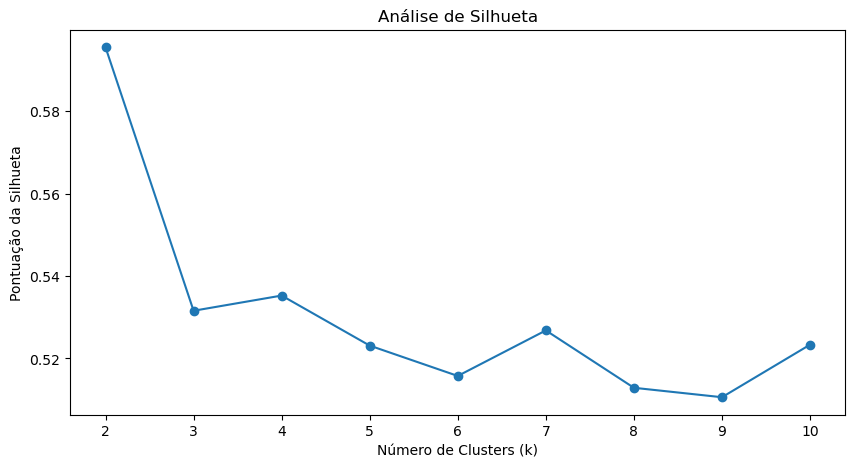

In [29]:
# Análise de Silhueta
silhouette_scores = [] # armazenar as pontuações de silhueta para diferentes numeros de cluster
for k in range(2, 11): # loop para iterar a faixa de de valores de k de 2 a 10 cluster
    kmeans = KMeans(n_clusters=k, random_state=42) # garente a reprodutividade dos numeros de cluster defindos(k)
    labels = kmeans.fit_predict(x) # previsao dos rotulos dos cluster, contem a atribuição de cluster para cada ponto de dados
    score = silhouette_score(x, labels) # calculo da pontuação de cada cluster, é armazenado em em uma variavel SCORE
    silhouette_scores.append(score) # adição do valor calculado para o numero atual de cluster

# Plotando o gráfico de silhueta
plt.figure(figsize=(10, 5))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Pontuação da Silhueta')
plt.title('Análise de Silhueta')
plt.show()

### A analise de silhueta serve para avaliar e validar a qualidade dos clusters após determinar o número de clusters. É útil para confirmar se o agrupamento escolhido é realmente bom e para comparar diferentes agrupamentos.

## Pré-processsamento de dados

In [30]:
# Criar o Padronizador

padronizador = StandardScaler()

In [31]:
# Aplicando o padronizador apenas nas variaveis de interrese

dados_padronizados = padronizador.fit_transform(df[[
                                                    'salario_anual',
                                                    'total_gasto']])

In [32]:
print(dados_padronizados)

[[-0.82256938 -0.98388467]
 [-0.58625231 -0.44640285]
 [-0.32244033 -0.34958936]
 ...
 [-0.03465247  0.428257  ]
 [ 0.85125617  0.41156502]
 [-1.43596511 -0.96218509]]


## Construção de um modelo de ML para segmentação de clientes

In [33]:
# Defindo o numero de Clusters (k)
k = 3

In [34]:
# Criando o modelo de K-means
kmeans = KMeans(n_clusters=k, random_state=42)



In [35]:
# Treinando os modelos com os dados padronizados

kmeans.fit(dados_padronizados)

KMeans(n_clusters=3, random_state=42)

In [36]:
# atribuindo os rotulos dos clusters aos clinetes
df['Clusters'] = kmeans.labels_

## Salvando o modelo

In [37]:
df['tipo_cliente'] = df['Clusters']
df['tipo_cliente'] = df['tipo_cliente'].replace({
                        0 : 'Ouro',
                        1 : 'Prata',
                        2 : 'Bronze'})

In [38]:
#joblib.dump(kmeans, 'kmeans_model.pkl')
#df.to_csv('clusters_result.csv', index=False)
#df = pd.read_csv('clusters_result.csv')
#df

## Explorando os resultado de segmentação

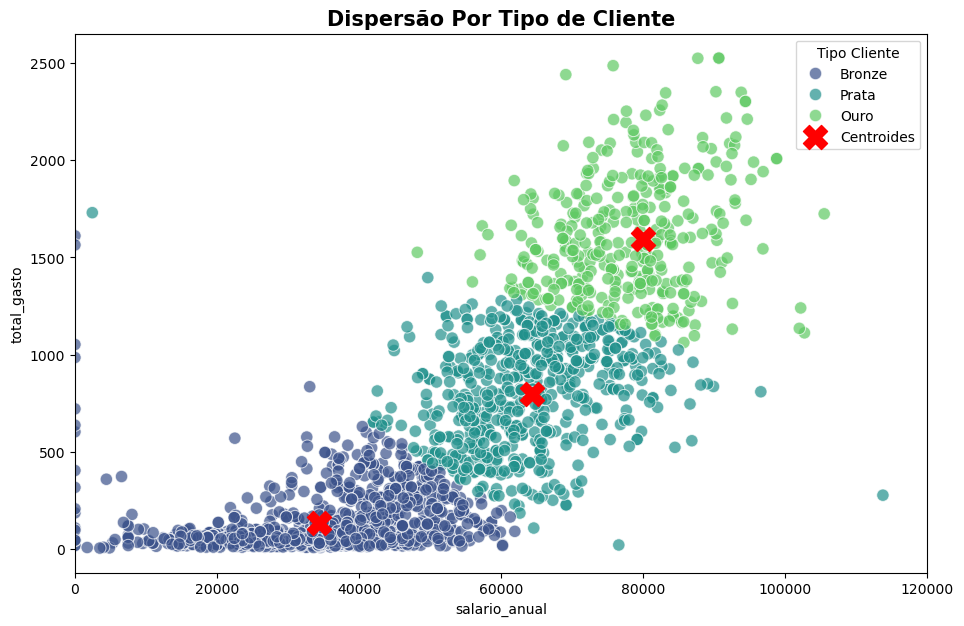

In [39]:
centroides = kmeans.cluster_centers_

centroides_originais = padronizador.inverse_transform(centroides)

plt.figure(figsize=(11, 7))
sns.scatterplot(data=df,
                x='salario_anual',
                y='total_gasto',
                hue='tipo_cliente',
                palette='viridis', 
                s=80,
                alpha=0.7,) 
plt.scatter(centroides_originais[:, 0],
            centroides_originais[:, 1],
            s=300,
            c='red',
            marker='X',
            label='Centroides')
plt.xlim(0, 120000)
plt.title('Dispersão Por Tipo de Cliente',
          weight = 'bold',
          fontsize=15)
plt.legend(title='Tipo Cliente')
plt.show()

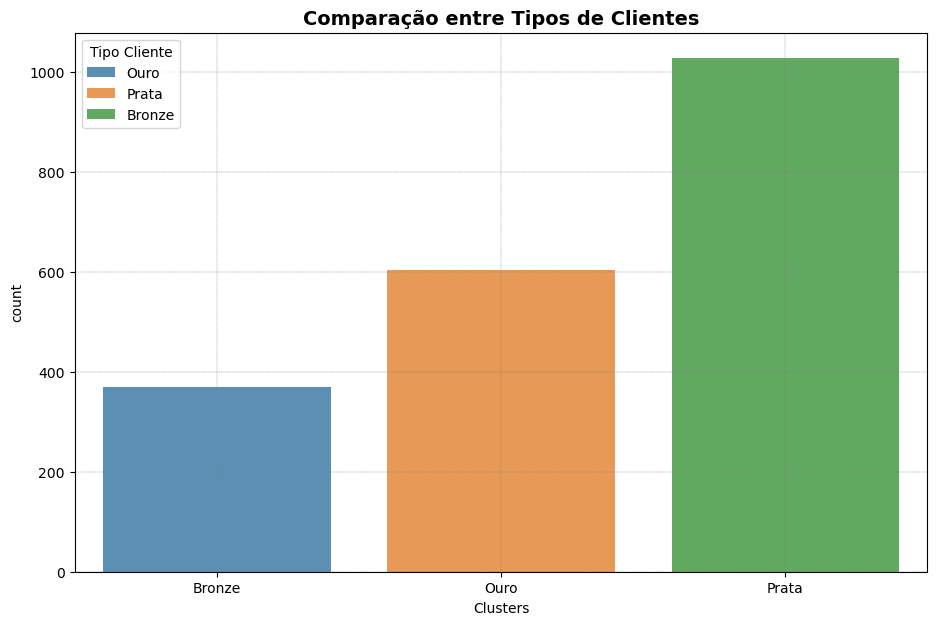

In [40]:
plt.figure(figsize=(11,7))
sns.countplot(data=df,
              x='Clusters',
              hue='tipo_cliente',
              alpha=0.8
              )
plt.title('Comparação entre Tipos de Clientes',
          fontsize=14,
          weight='bold')
plt.legend(title='Tipo Cliente')
plt.xticks(ticks=[0,1,2],
           labels=['Bronze',
                   'Ouro',
                   'Prata'])
plt.grid(color='gray',
         linestyle='--',
         linewidth=0.3)

plt.show()

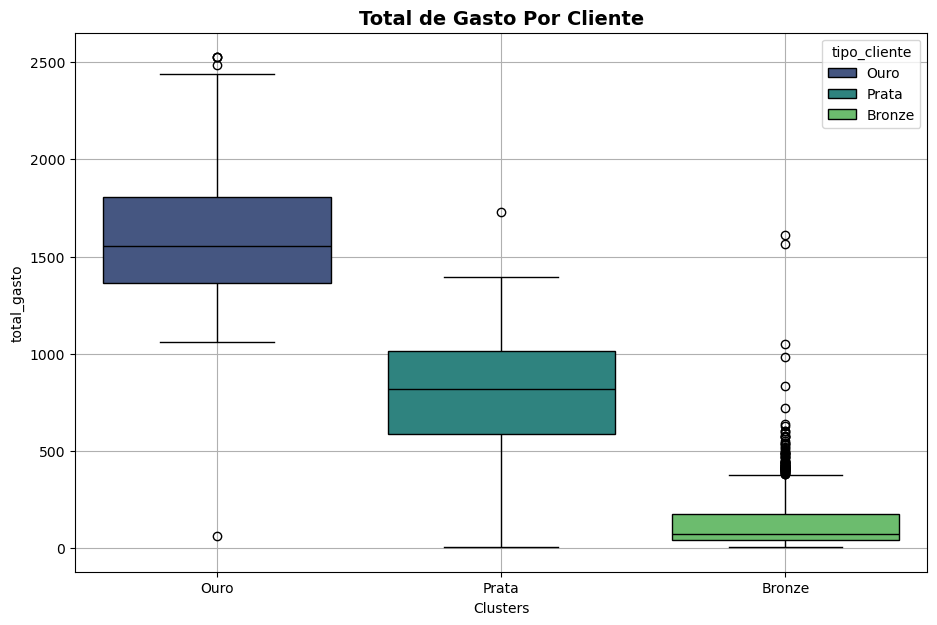

In [41]:
plt.figure(figsize=(11,7))
sns.boxplot(data=df,
        x = 'Clusters',
        y = 'total_gasto',
        palette = 'viridis',
        hue = 'tipo_cliente',
        linecolor = 'black'
           )
plt.title('Total de Gasto Por Cliente',
          weight = 'bold',
          fontsize = 14)
plt.xticks(ticks=[0,1,2], labels=['Ouro', 'Prata', 'Bronze'])
plt.grid()
plt.show()

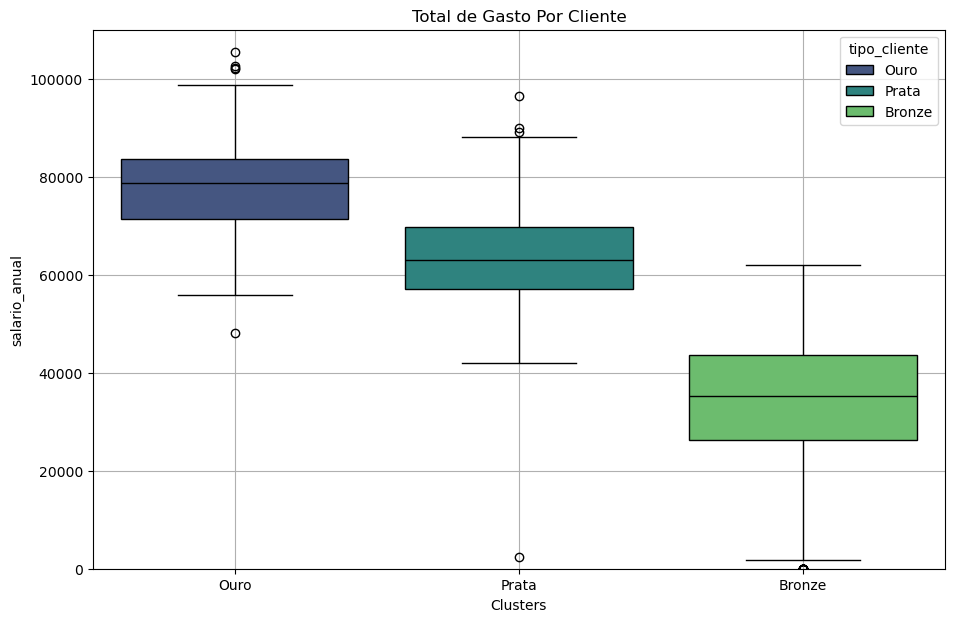

In [42]:
plt.figure(figsize=(11,7))
sns.boxplot(data=df,
        x = 'Clusters',
        y = 'salario_anual',
        palette = 'viridis',
        hue = 'tipo_cliente',
        linecolor = 'black'
           )
plt.title('Total de Gasto Por Cliente')
plt.ylim(0, 110000)
plt.grid()
plt.xticks(ticks=[0, 1, 2], labels=['Ouro', 'Prata', 'Bronze'])
plt.show()

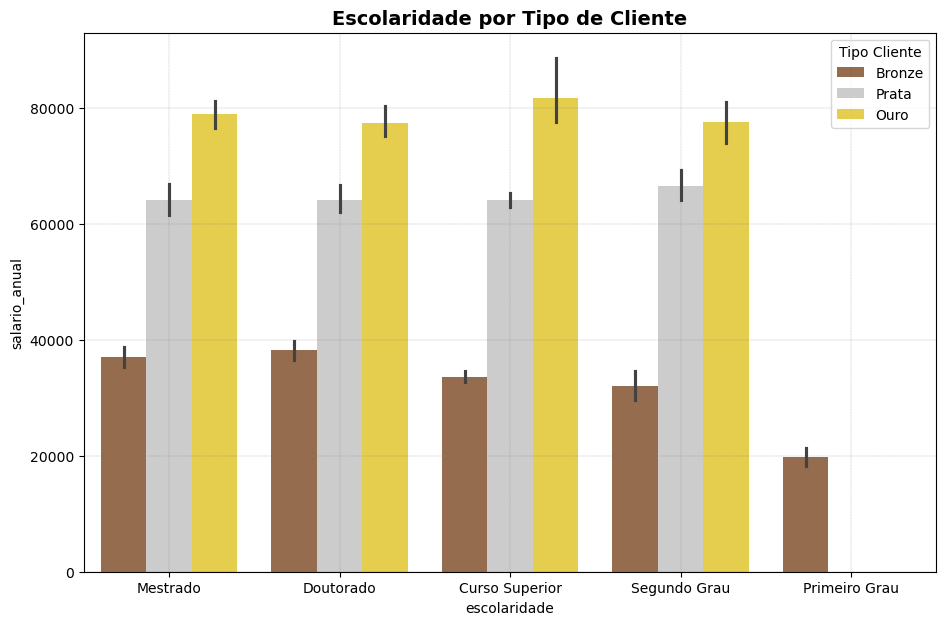

In [48]:

plt.figure(figsize=(11,7))
sns.barplot(data=df,
            x='escolaridade',
            y='salario_anual',
            hue='tipo_cliente',
            
            alpha= 0.8,
            palette=['#8B4513','#C0C0C0','#FFD700'])
plt.title('Escolaridade por Tipo de Cliente',
          fontsize=14,
          weight = 'bold')
plt.xlabel = ('Escolaridade')
plt.ylabel = ('Salario Anual')
plt.grid(color = 'grey',
         linestyle = '--',
         linewidth=0.2)
plt.legend(title='Tipo Cliente')
plt.show()

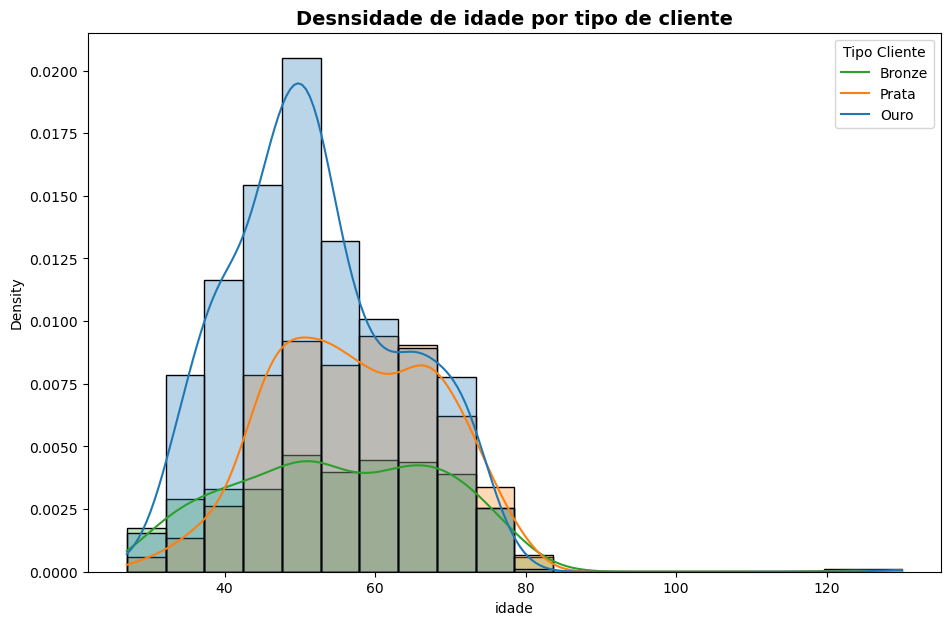

In [46]:
plt.figure(figsize=(11,7))
sns.histplot(data=df,
             x = 'idade',
             hue='tipo_cliente',
             kde = True,
             bins  =20,
             alpha= 0.3,
             edgecolor = 'black',
             stat = 'density')
plt.title('Desnsidade de idade por tipo de cliente',
          fontsize=14,
          weight = 'bold')
plt.legend(title='Tipo Cliente', labels=df['tipo_cliente'].unique())
